# Imports

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from scipy.optimize import fmin
import torch
import os, glob

from indentation.indentationset import IndentationSet
from indentation.processing.find_contact import findContact_minimum, findContact_blackMagic, findContact_blackMagic_CNN
from indentation.processing.signal import do_nothing, crop
from indentation.processing.calculate_parameters import parameter_youngs_modulus
from indentation.processing.plotting import plot_curve_parameters_bar, plot_instance_parameters_bar, plot_mean_force_curves
from indentation.ml.models import ConvClassifier_1, ConvClassifier_2

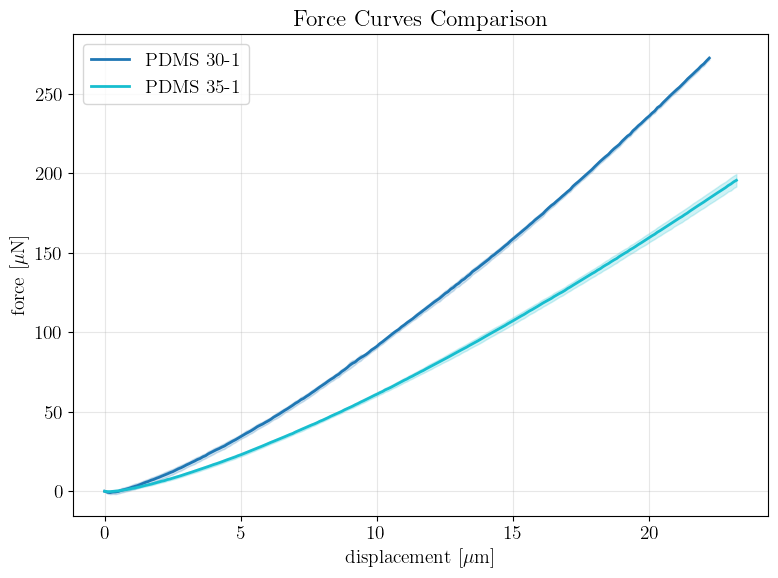

In [13]:
path = r"Z:\Group\File_Exchange\Raoul_Paula\PDMS_30t1_ft_061124.dat"
p30 = IndentationSet(path, exp_type="ft")

path = r"Z:\Group\File_Exchange\Raoul_Paula\PDMS_35t1_ft_061124.dat"
p35 = IndentationSet(path, exp_type="ft")

processing_pl = [findContact_blackMagic]

p30.process_raw(processing_pl)
p35.process_raw(processing_pl)

p30.calculate_mean()
p35.calculate_mean()

plot_mean_force_curves(p30, p35, labels=["PDMS 30-1", "PDMS 35-1"])

Mean and std: 164.07621944190376 0.9892383397897966
Mean and std: 109.84916533242763 1.3333817962947143


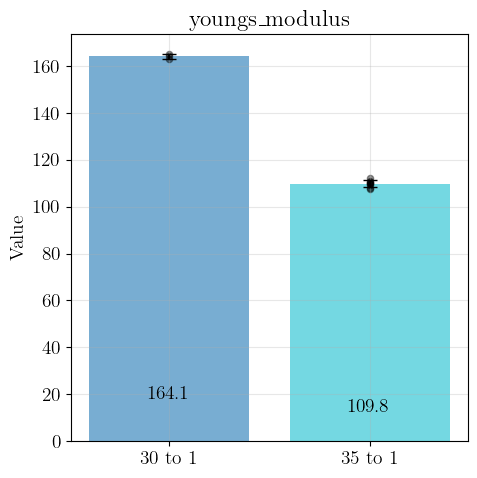

In [14]:
function_arguments = dict(radius=100, nu=0.5, cutoff=10, keyname="youngs_modulus")
p30.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)
p35.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)
plot_curve_parameters_bar(p30, p35, 
                          parameter_names=['youngs_modulus'],
                          labels=['30 to 1', '35 to 1'],
                          figsize=(5,5))

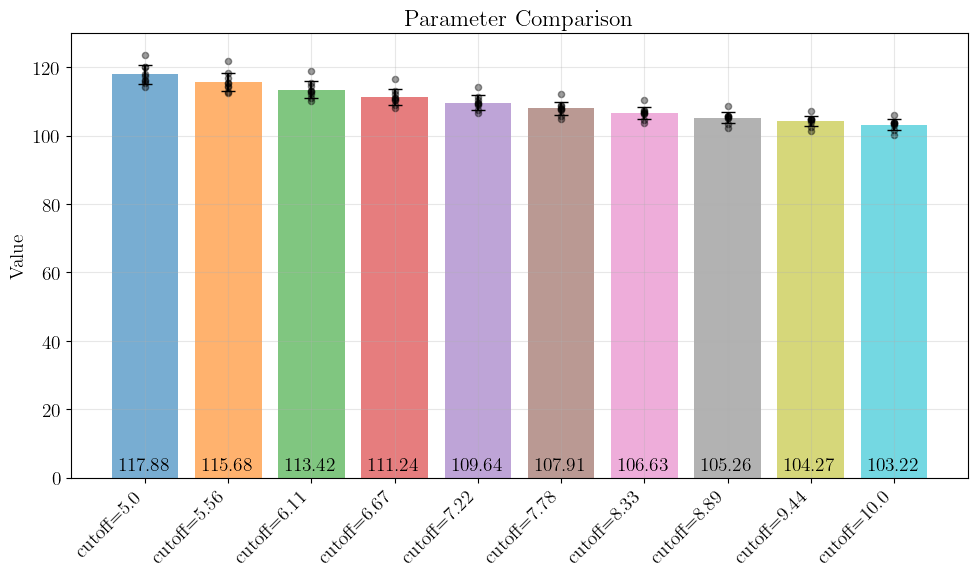

In [26]:
cutoffs = np.linspace(5, 10, 10)

for cutoff in cutoffs:
    function_arguments = dict(radius=100, nu=0.5, cutoff=cutoff, keyname="cutoff="+str(np.round(cutoff, 2)))
    afm.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)

plot_instance_parameters_bar(afm,
                         parameter_names=[*["cutoff="+str(np.round(cutoff, 2)) for cutoff in cutoffs]],
                         figsize=(10,6))

In [15]:
0.55*35

19.25

In [8]:
import numpy as np

 

def get_pdms_stiffness(ratio):

    return 1000*5.6*np.exp(-5.4*(ratio/40))

 

# set ratio (a value of 10 is "10:1" etc)

ratio = 64

 

print(get_pdms_stiffness(ratio))

0.9905666525583728


In [9]:
get_pdms_stiffness(30)

np.float64(97.56529798116361)